In [16]:
import cv2
import numpy as np
from PIL import Image 
import tensorflow as tf
import random
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [25]:
def generate_img1(images):
    r = np.arange(0,256)
    c = 255/(np.log(1 + 255))
    y = c*np.log(1+r)

    log_image = c*np.log(images+1)
    log_image = np.array(log_image, dtype=np.uint8)
    
    return log_image

In [26]:
def generate_img2(images):
    r = np.arange(0,256)
    c = 255/(np.log(1 + 255))
  
    log_image = np.exp(images**1/c)-1
    log_image = np.array(log_image, dtype=np.uint8)
    
    return log_image

In [27]:
def img_preprocessing(image):
    image_2 = cv2.blur(image,(3,3))
    image_3 = cv2.GaussianBlur(image,(5,5),10)
    
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # faire pivoter l'image de 45 dégrées
    M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
    image_4 = cv2.warpAffine(image, M, (w, h))
    
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # faire pivoter l'image de -90 dégrées
    M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
    image_5 = cv2.warpAffine(image, M, (w, h))
    
    image_6 = generate_img1(image)
    image_7 = generate_img2(image)
    
    return image_2, image_3, image_4, image_5, image_6, image_7

In [6]:
#définition
#- with mask : 1
#- without mask : 0

##- mask weared incorrect : 2
label_names = ['Sans masque','Avec masque']

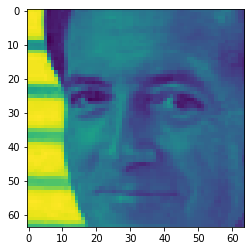

In [23]:
plt.imshow(images[19])

In [31]:
def getDataSet():

    
    for idx in range(1,3001):
        
        img_name = idx+'.png'

        im = Image.open('Dataset/with_mask/'+img_name)
        imarray = np.array(im)
        image = cv2.cvtColor(imarray, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image,(64,64))
        image_2, image_3, image_4, image_5, image_6, image_7 = img_preprocessing(image)
        
        images.append(image)
        images.append(image_2)
        images.append(image_3)
        images.append(image_4)
        images.append(image_5)
        images.append(image_6)
        images.append(image_7)
        
        targets.append(1)
        targets.append(1)
        targets.append(1)
        targets.append(1)
        targets.append(1)
        targets.append(1)
        targets.append(1)
        
        if int(idx) < 2295 :
            im = Image.open('Dataset/without_mask/'+img_name)
            imarray = np.array(im)
            image = cv2.cvtColor(imarray, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image,(64,64))
            image_2, image_3, image_4, image_5, image_6, image_7 = img_preprocessing(image)
        
            images.append(image)
            images.append(image_2)
            images.append(image_3)
            images.append(image_4)
            images.append(image_5)
            images.append(image_6)
            images.append(image_7)

            targets.append(0)
            targets.append(0)
            targets.append(0)
            targets.append(0)
            targets.append(0)
            targets.append(0)
            targets.append(0)
            
    
    images = np.array(images)
    targets = np.array(targets)
    images, targets = shuffle(images, targets)
    
    print('images shape: ', images.shape)
    print('targets shape: ', targets.shape)
            
    return images, targets

In [32]:
images, targets = getDataSet()

C:\Users\toshiba\AppData\Local\Temp\ipykernel_1360\2990874806.py:6: RuntimeWarning: divide by zero encountered in log
  log_image = c*np.log(images+1)


images shape:  (37058, 64, 64)
targets shape:  (37058,)


Sans masque


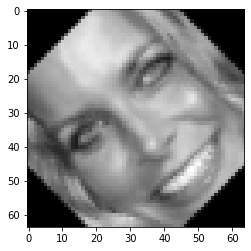

In [40]:
print(label_names[targets[100]])
plt.imshow(images[100],cmap='gray')
plt.show()

In [9]:
images = images.reshape(-1,4096) #flattern
images = images.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)

# découpage jeu entrainement && test
images_train, images_test, target_train, target_test = train_test_split(images,targets,test_size=0.2, random_state=0)

#show dimension
print(images.shape)
print(targets.shape)

(37058, 4096)
(37058,)


In [10]:
images_train = images_train.reshape(-1, 64, 64, 1)
images_test = images_test.reshape(-1, 64, 64, 1)

print('Images train: ',images_train.shape)
print('Images test: ',images_test.shape)

Images train:  (29646, 64, 64, 1)
Images test:  (7412, 64, 64, 1)


In [11]:
print(images[0:1].shape)
#Create Model
model = tf.keras.models.Sequential()

# CONVOLUTION
model.add(tf.keras.layers.Convolution2D(filters=32,kernel_size=3,strides=1,input_shape=(64,64,1),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Convolution2D(filters=64,kernel_size=3,strides=1,input_shape=(64,64,1),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=3,strides=1,input_shape=(64,64,1),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(0.3))

# FLATTERN
model.add(tf.keras.layers.Flatten())

# DENSE LAYERS
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(84,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

model_output = model.predict(images_train[0:1])
print(model_output)

(1, 4096)
[[0.49753046]]


In [12]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [13]:
#Compile the model
#USpr^cA37l1qhZ6q#rZz
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [14]:
#train model
history = model.fit(images_train,target_train,epochs=10,validation_split=0.3)

Epoch 1/10
649/649 [==============================] - 171s 263ms/step - loss: 0.3784 - accuracy: 0.8197 - val_loss: 0.1914 - val_accuracy: 0.9246
Epoch 2/10
649/649 [==============================] - 215s 332ms/step - loss: 0.1766 - accuracy: 0.9310 - val_loss: 0.1473 - val_accuracy: 0.9483
Epoch 3/10
649/649 [==============================] - 173s 267ms/step - loss: 0.1274 - accuracy: 0.9512 - val_loss: 0.1080 - val_accuracy: 0.9602
Epoch 4/10
649/649 [==============================] - 165s 254ms/step - loss: 0.1108 - accuracy: 0.9557 - val_loss: 0.0991 - val_accuracy: 0.9618
Epoch 5/10
649/649 [==============================] - 152s 234ms/step - loss: 0.0996 - accuracy: 0.9617 - val_loss: 0.0955 - val_accuracy: 0.9629
Epoch 6/10
649/649 [==============================] - 140s 215ms/step - loss: 0.0843 - accuracy: 0.9662 - val_loss: 0.0667 - val_accuracy: 0.9771
Epoch 7/10
649/649 [==============================] - 154s 237ms/step - loss: 0.0762 - accuracy: 0.9701 - val_loss: 0.0766 -

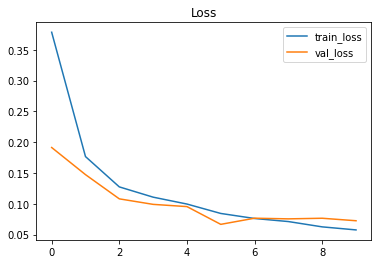

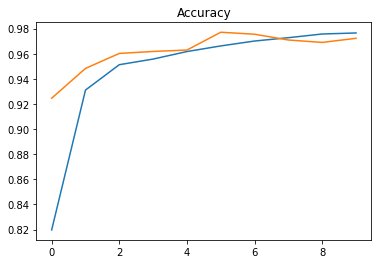

In [15]:
loss_curve = history.history["loss"]
val_loss_curve = history.history["val_loss"]

acc_curve = history.history["accuracy"]
val_acc_curve = history.history["val_accuracy"]

plt.plot(loss_curve,label="train_loss")
plt.plot(val_loss_curve,label="val_loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(acc_curve,label="train_acc")
plt.plot(val_acc_curve,label="val_acc")
plt.title("Accuracy")
plt.show()

In [16]:
#model.save('mask_detection_cnn2.h5') #firstname : catdog_convolution_nn

In [17]:
# charger le model sauvegardé
loaded_model = tf.keras.models.load_model('mask_detection_cnn2.h5')
#loss, acc = loaded_model.evaluate(images_test, target_test)
#print("Loss: ",loss)
#print("Acc: ",acc)

### Déploiement du modele

In [18]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [19]:
from time import sleep
from keras.preprocessing.image import img_to_array

In [22]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(64,64),interpolation=cv2.INTER_AREA)


        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
            
            prediction = loaded_model.predict(roi)[0][0]
            label=label_names[round(prediction)]
            label = label + f'{round(prediction, 3)}'
            #label=label_names[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Detecteur de masque',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [10]:
a = 0.223333